<a href="https://colab.research.google.com/github/clapinel/CPD_Crime_Senior_Thesis/blob/master/3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
file_name = '/content/drive/My Drive/cleaned.csv'

In [0]:
cleaned = pd.read_csv(file_name)

In [5]:
cleaned.shape

(3810430, 33)

In [6]:
cleaned.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
Violent                  object
Cannabis                   bool
Firearm                    bool
Year_Month_Day           object
Year_Month               object
Month_Num                 int64
Month                    object
Weekday_Num               int64
Weekday 

In [0]:
cleaned = cleaned.query('Year==2010')

In [8]:
cleaned.shape

(369792, 33)

In [9]:
cleaned.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Violent,Cannabis,Firearm,Year_Month_Day,Year_Month,Month_Num,Month,Weekday_Num,Weekday,Time_Bucket
328,64415,7567626,HS372232,2010-06-21 23:26:00,009XX W VAN BUREN ST,0610,BURGLARY,FORCIBLE ENTRY,BANK,True,False,1232,12.0,25.0,28.0,05,1170394.0,1898376.0,2010,06/05/2019 04:10:34 PM,41.876632,-87.649829,"(41.876632378, -87.649829352)",Non-Violent,False,False,2010-06-21,2010-06,6,July,0,Monday,[20:00-23:59]
404,64519,8815863,HV489374,2010-04-04 00:00:00,061XX S THROOP ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,True,True,713,7.0,16.0,67.0,02,1168677.0,1864047.0,2010,06/06/2019 04:02:57 PM,41.782468,-87.657126,"(41.782467577, -87.657125736)",Violent,False,False,2010-04-04,2010-04,4,May,6,Sunday,[04:00-7:59]
568,64749,7404923,HS207282,2010-03-13 20:00:00,055XX S CARPENTER ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,712,7.0,16.0,68.0,02,1170258.0,1868049.0,2010,06/08/2019 04:14:50 PM,41.793415,-87.651213,"(41.793415261, -87.651212934)",Violent,False,False,2010-03-13,2010-03,3,April,5,Saturday,[20:00-23:59]
815,65088,11653451,JC222362,2010-12-20 00:00:00,011XX W 17TH ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,1235,12.0,25.0,31.0,17,1169111.0,1891898.0,2010,06/12/2019 04:05:16 PM,41.858884,-87.654728,"(41.858884176, -87.654728116)",Non-Violent,False,False,2010-12-20,2010-12,12,December,0,Monday,[04:00-7:59]
981,65314,8877480,HV531704,2010-12-15 10:00:00,003XX W ERIE ST,1120,DECEPTIVE PRACTICE,FORGERY,OTHER,True,False,1831,18.0,42.0,8.0,10,1173693.0,1904712.0,2010,06/14/2019 03:58:14 PM,41.893946,-87.637528,"(41.893946016, -87.637527948)",Non-Violent,False,False,2010-12-15,2010-12,12,December,2,Wednesday,[08:00-11:59]


In [0]:
cleaned = cleaned.rename(columns={"Violent":"Violence"})

In [11]:
cleaned.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'Violence', 'Cannabis', 'Firearm',
       'Year_Month_Day', 'Year_Month', 'Month_Num', 'Month', 'Weekday_Num',
       'Weekday', 'Time_Bucket'],
      dtype='object')

In [0]:
cleaned = cleaned.query('Violence=="Violent"')

In [13]:
cleaned.shape

(37560, 33)

In [0]:
violent_counts=cleaned.groupby('Community Area').count()

In [15]:
violent_counts.head()
violent_counts.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Violence', 'Cannabis', 'Firearm', 'Year_Month_Day',
       'Year_Month', 'Month_Num', 'Month', 'Weekday_Num', 'Weekday',
       'Time_Bucket'],
      dtype='object')

In [0]:
counts = violent_counts['Description'].to_list()

In [17]:
type(counts)
counts

[649,
 472,
 490,
 187,
 126,
 546,
 294,
 798,
 21,
 82,
 99,
 34,
 88,
 310,
 349,
 349,
 168,
 72,
 728,
 227,
 349,
 759,
 1187,
 947,
 2624,
 692,
 851,
 869,
 1164,
 755,
 299,
 597,
 167,
 145,
 281,
 91,
 133,
 555,
 252,
 462,
 211,
 739,
 1368,
 995,
 236,
 875,
 65,
 237,
 1212,
 181,
 323,
 190,
 804,
 218,
 70,
 187,
 125,
 320,
 129,
 216,
 750,
 146,
 441,
 111,
 211,
 1247,
 1277,
 1241,
 1169,
 392,
 1219,
 89,
 481,
 67,
 324,
 65,
 361]

In [0]:
pop_file = '/content/drive/My Drive/CCASF12010CMAP.csv'
pop_table = pd.read_csv(pop_file)


In [19]:
pop = pop_table['Total Population'].to_list()
pop

[54991,
 71942,
 56362,
 39493,
 31867,
 94368,
 64116,
 80484,
 11187,
 37023,
 25448,
 18508,
 17931,
 51542,
 64124,
 53359,
 41932,
 13426,
 78743,
 25010,
 39262,
 72791,
 56323,
 82236,
 98514,
 18001,
 20567,
 54881,
 35912,
 79288,
 35769,
 29283,
 21390,
 13391,
 18238,
 5918,
 2876,
 21929,
 17841,
 11717,
 25681,
 23740,
 52010,
 31028,
 10185,
 31198,
 2916,
 13812,
 44619,
 7325,
 15109,
 23042,
 29651,
 6482,
 9426,
 34513,
 13393,
 45368,
 15612,
 31977,
 44377,
 18109,
 39894,
 23139,
 33355,
 55628,
 35505,
 30654,
 32602,
 41081,
 48743,
 20034,
 26493,
 19093,
 22544,
 12756,
 56521]

In [0]:
# join violent counts and population 

df_rate = pd.DataFrame({'crime_count':counts,
                        'pop':pop})

In [21]:
df_rate.shape

(77, 2)

In [22]:
df_rate.head()

,crime_count,pop
0,649,54991
1,472,71942
2,490,56362
3,187,39493
4,126,31867


In [0]:
df_rate['violent_rate'] = (df_rate['crime_count']/df_rate['pop'])*100000

In [24]:
df_rate

,crime_count,pop,violent_rate
0,649,54991,1180.193123
1,472,71942,656.084068
2,490,56362,869.380079
3,187,39493,473.501633
4,126,31867,395.393354
...,...,...,...
72,481,26493,1815.573925
73,67,19093,350.913948
74,324,22544,1437.189496
75,65,12756,509.564127


In [0]:
# have crime rate, join it so socioeconomic factor table

In [0]:
file_name = '/content/drive/My Drive/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv'

In [0]:
socio = pd.read_csv(file_name)

In [0]:
socio['Violent_Rate'] = df_rate['violent_rate']

In [29]:
socio.head(78)

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Violent_Rate
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,1180.193123
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,656.084068
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,869.380079
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,473.501633
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,395.393354
...,...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0,350.913948
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0,1437.189496
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0,509.564127
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0,638.700660


In [30]:
socio.shape

(78, 10)

In [0]:
socio = socio.drop([77])

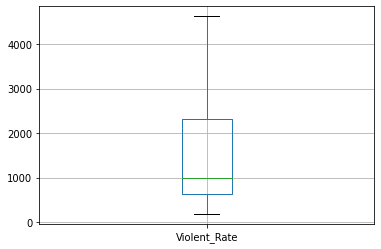

In [32]:
boxplot = socio.boxplot(column='Violent_Rate')
boxplot


In [0]:
rate_list = socio['Violent_Rate'].to_list()

In [34]:
rate_list

[1180.1931225109563,
 656.0840677212199,
 869.3800787764807,
 473.5016332008204,
 395.39335362600815,
 578.585961342828,
 458.5438892008235,
 991.5014164305949,
 187.71788683293107,
 221.48394241417498,
 389.0286073561773,
 183.7043440674303,
 490.77017455802803,
 601.4512436459586,
 544.2580001247583,
 654.0602335126221,
 400.6486692740628,
 536.2729033219127,
 924.5266245888523,
 907.6369452219112,
 888.9002088533442,
 1042.7113242021678,
 2107.4871722031853,
 1151.5637920132303,
 2663.5808108492197,
 3844.230876062441,
 4137.69630962221,
 1583.4259579818151,
 3241.256404544442,
 952.2248007264654,
 835.919371522827,
 2038.7255404159412,
 780.7386629266013,
 1082.8168172653275,
 1540.7391161311548,
 1537.6816492058128,
 4624.478442280946,
 2530.8951616580785,
 1412.4768790987052,
 3942.988819663736,
 821.6190958296017,
 3112.889637742207,
 2630.2634108825223,
 3206.780972025267,
 2317.1330387825233,
 2804.666965831143,
 2229.080932784637,
 1715.8992180712426,
 2716.3316076111073,
 24

In [35]:
socio.columns

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Violent_Rate'],
      dtype='object')

In [0]:
# plot histograms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a2f5f9940>]],
      dtype=object)

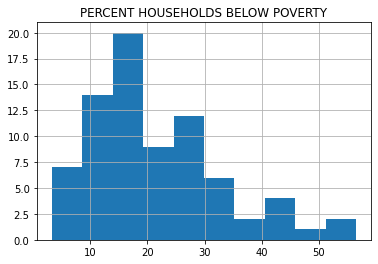

In [36]:
socio.hist(column='PERCENT HOUSEHOLDS BELOW POVERTY')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a3594a780>]],
      dtype=object)

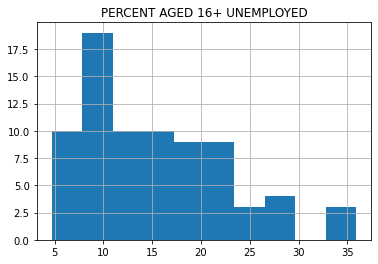

In [37]:
socio.hist(column='PERCENT AGED 16+ UNEMPLOYED')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a28894d30>]],
      dtype=object)

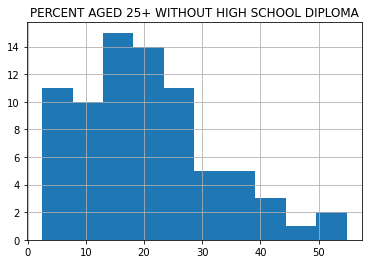

In [38]:
socio.hist(column='PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a29286358>]],
      dtype=object)

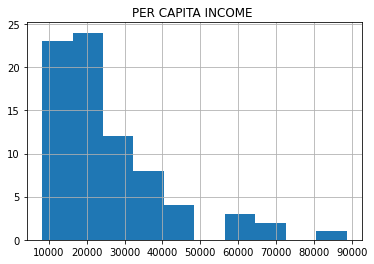

In [39]:
socio.hist(column='PER CAPITA INCOME ')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a28bbb390>]],
      dtype=object)

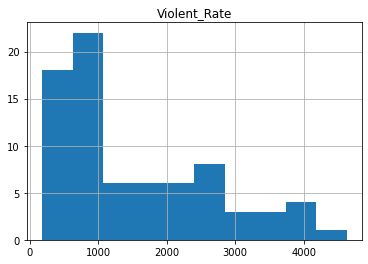

In [40]:
socio.hist(column='Violent_Rate')


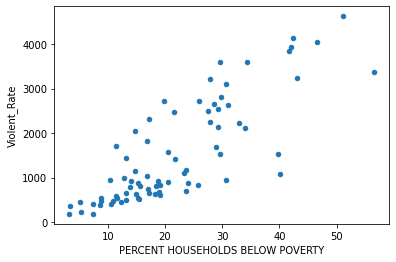

In [41]:
socio.plot.scatter(y='Violent_Rate', x='PERCENT HOUSEHOLDS BELOW POVERTY')

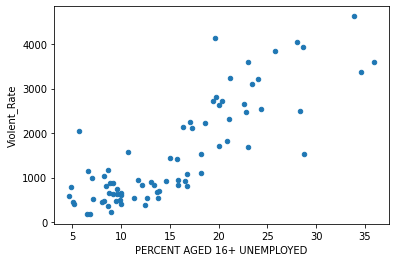

In [42]:
socio.plot.scatter(y='Violent_Rate', x='PERCENT AGED 16+ UNEMPLOYED')

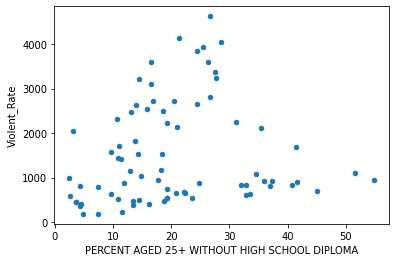

In [43]:
socio.plot.scatter(y='Violent_Rate', x='PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA')

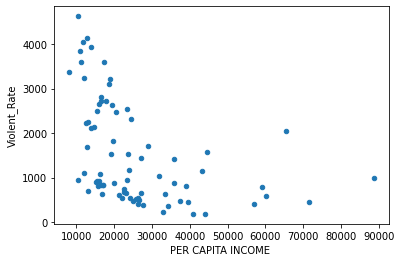

In [44]:
socio.plot.scatter(y='Violent_Rate', x='PER CAPITA INCOME ')

In [0]:
import numpy as np

In [0]:
socio['Logged PERCENT HOUSEHOLDS BELOW POVERTY'] = np.log10(socio['PERCENT HOUSEHOLDS BELOW POVERTY'])
socio['Logged PERCENT AGED 16+ UNEMPLOYED'] = np.log10(socio['PERCENT AGED 16+ UNEMPLOYED'])
socio['Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'] = np.log10(socio['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'])
socio['Logged PER CAPITA INCOME '] = np.log10(socio['PER CAPITA INCOME '])
socio['Logged Violent_Rate'] = np.log10(socio['Violent_Rate'])

In [47]:
socio.columns

Index(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Violent_Rate',
       'Logged PERCENT HOUSEHOLDS BELOW POVERTY',
       'Logged PERCENT AGED 16+ UNEMPLOYED',
       'Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'Logged PER CAPITA INCOME ', 'Logged Violent_Rate'],
      dtype='object')

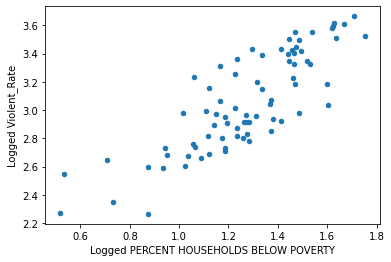

In [48]:
socio.plot.scatter(y='Logged Violent_Rate', x='Logged PERCENT HOUSEHOLDS BELOW POVERTY')

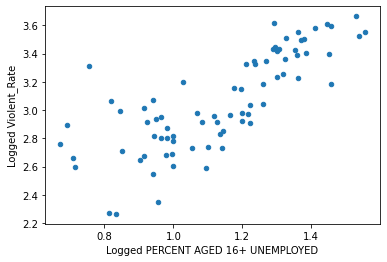

In [49]:
socio.plot.scatter(y='Logged Violent_Rate', x='Logged PERCENT AGED 16+ UNEMPLOYED')

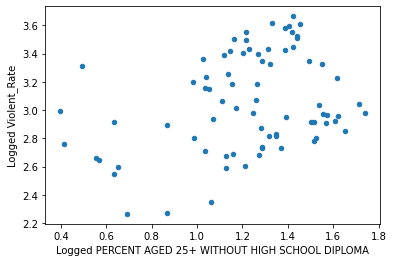

In [50]:
socio.plot.scatter(y='Logged Violent_Rate', x='Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA')

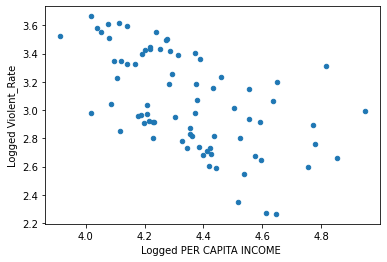

In [51]:
socio.plot.scatter(y='Logged Violent_Rate', x='Logged PER CAPITA INCOME ')

In [52]:
for_descr = socio[['Violent_Rate','PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PER CAPITA INCOME ']]
for_descr.describe()

,Violent_Rate,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PER CAPITA INCOME
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1531.306979,21.766234,15.372727,20.341558,25563.168831
std,1149.753646,11.529957,7.543412,11.823152,15293.098259
min,183.704344,3.300000,4.700000,2.500000,8201.000000
25%,638.700660,13.200000,9.200000,11.800000,15754.000000
50%,991.501416,18.900000,13.900000,18.500000,21323.000000
75%,2317.133039,29.200000,20.000000,26.600000,28887.000000
max,4624.478442,56.500000,35.900000,54.800000,88669.000000


In [0]:
# prep data for reg
X = socio[['Logged PERCENT HOUSEHOLDS BELOW POVERTY',
       'Logged PERCENT AGED 16+ UNEMPLOYED',
       'Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'Logged PER CAPITA INCOME ']]
y = socio['Logged Violent_Rate']

In [54]:
import statsmodels.api as sm # import statsmodels 

X = socio[['Logged PERCENT HOUSEHOLDS BELOW POVERTY',
       'Logged PERCENT AGED 16+ UNEMPLOYED',
       'Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'Logged PER CAPITA INCOME ']]
y = socio['Logged Violent_Rate']
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Logged Violent_Rate   R-squared:                       0.833
Model:                             OLS   Adj. R-squared:                  0.824
Method:                  Least Squares   F-statistic:                     90.08
Date:                 Sat, 09 May 2020   Prob (F-statistic):           2.92e-27
Time:                         01:36:36   Log-Likelihood:                 41.814
No. Observations:                   77   AIC:                            -73.63
Df Residuals:                       72   BIC:                            -61.91
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   1.6234      1.261      1.288      0.202      -0.889       4.136
Logged PERCENT HOUSEHOLDS BELOW POVERTY                 0.8717      0.097      8.978      0.000       0.678       1.065
Logged PERCENT AGED 16+ UNEMPLOYED                      0.8105      0.154      5.275      0.000       0.504       1.117
Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    -0.4026      0.118     -3.400      0.001      -0.639      -0.167
Logged PER CAPITA INCOME                               -0.0235      0.233     -0.101      0.920      -0.489       0.442
==============================================================================
Omnibus:                        3.783   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.046
Skew:                          -0.357   Prob(JB):                        0.218
Kurtosis:                       3.664   Cond. No.                         384.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [57]:
vif.round(1)

,VIF Factor,features
0,5789.1,const
1,2.2,Logged PERCENT HOUSEHOLDS BELOW POVERTY
2,4.1,Logged PERCENT AGED 16+ UNEMPLOYED
3,4.9,Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DI...
4,9.4,Logged PER CAPITA INCOME


In [69]:
model.resid.to_list()

[0.1005334384629486,
 -0.015774656875684023,
 -0.11822932958040555,
 -0.03177549295664672,
 0.00528884199280677,
 -0.04769417560073741,
 -0.14751219443540364,
 -0.003654525686116905,
 -0.002416952399542982,
 -0.1567177966948563,
 -0.17604088151133412,
 -0.4097815290774256,
 -0.14594581730869427,
 -0.06079438225811229,
 -0.08668154666252192,
 0.055639074138641664,
 -0.13407653313080425,
 -0.19652287559209514,
 0.021376827301255563,
 0.035564484994833556,
 0.17340718507132458,
 0.16301537370848562,
 0.08398016580318934,
 0.3121601954832527,
 0.0924099473303337,
 0.0592470386418773,
 0.15889818264147149,
 0.10134884247490206,
 0.06357828921617292,
 -0.11805792872413301,
 -0.15613922633044508,
 0.3667975579335563,
 0.17815595972307152,
 -0.25927383914682123,
 -0.1714668171162983,
 -0.40186908652985354,
 -0.020400413292837705,
 -0.035401063444331804,
 -0.07664174198146911,
 0.03905635693239473,
 -0.19743594342714355,
 0.05424408242929113,
 0.003104043684435176,
 0.07332414662553965,
 0.1071

In [0]:
pred_val = model.fittedvalues.copy()
true_val = socio['Logged Violent_Rate'].values.copy()
residual = true_val-pred_val

In [0]:
import matplotlib.pyplot as plt


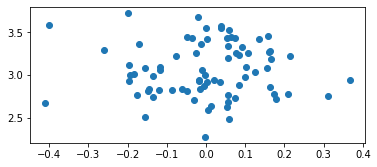

In [67]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)


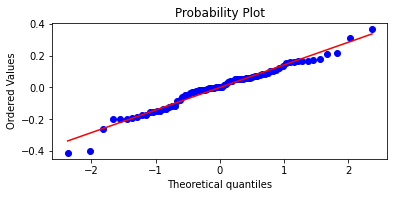

In [68]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [76]:
socio.loc[socio['Community Area Number']==36]


,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Violent_Rate,Logged PERCENT HOUSEHOLDS BELOW POVERTY,Logged PERCENT AGED 16+ UNEMPLOYED,Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,Logged PER CAPITA INCOME,Logged Violent_Rate
35,36.0,Oakland,1.3,39.7,28.7,18.4,40.4,19252,78.0,1537.681649,1.598791,1.457882,1.264818,4.284476,3.186866


In [0]:
# exclude these two outliers 
clean_1 = socio.copy()

In [0]:
clean_1 = clean_1.drop([11,35])


In [90]:
clean_1

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Violent_Rate,Logged PERCENT HOUSEHOLDS BELOW POVERTY,Logged PERCENT AGED 16+ UNEMPLOYED,Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,Logged PER CAPITA INCOME,Logged Violent_Rate
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939.0,39.0,1180.193123,1.372912,0.939519,1.260071,4.379106,3.071953
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040.0,46.0,656.084068,1.235528,0.944483,1.318063,4.362482,2.816959
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787.0,20.0,869.380079,1.380211,0.949390,1.071882,4.553725,2.939210
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524.0,17.0,473.501633,1.037426,0.913814,1.127105,4.574309,2.675321
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123.0,6.0,395.393354,0.875061,0.716003,0.653213,4.756811,2.597029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713.0,48.0,1815.573925,1.227887,1.318063,1.136721,4.294753,3.259014
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381.0,16.0,350.913948,0.531479,0.939519,0.633468,4.536319,2.545201
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149.0,30.0,1437.189496,1.120574,1.176091,1.033424,4.433754,3.157514
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828.0,24.0,509.564127,1.187521,0.851258,1.037426,4.412091,2.707199


In [91]:
import statsmodels.api as sm # import statsmodels 

X = clean_1[['Logged PERCENT HOUSEHOLDS BELOW POVERTY',
       'Logged PERCENT AGED 16+ UNEMPLOYED',
       'Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'Logged PER CAPITA INCOME ']]
y = clean_1['Logged Violent_Rate']
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Logged Violent_Rate   R-squared:                       0.862
Model:                             OLS   Adj. R-squared:                  0.854
Method:                  Least Squares   F-statistic:                     109.1
Date:                 Sat, 09 May 2020   Prob (F-statistic):           2.63e-29
Time:                         03:45:29   Log-Likelihood:                 49.493
No. Observations:                   75   AIC:                            -88.99
Df Residuals:                       70   BIC:                            -77.40
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   1.4022      1.152      1.217      0.228      -0.895       3.700
Logged PERCENT HOUSEHOLDS BELOW POVERTY                 0.8712      0.087     10.013      0.000       0.698       1.045
Logged PERCENT AGED 16+ UNEMPLOYED                      0.8718      0.140      6.211      0.000       0.592       1.152
Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    -0.4290      0.107     -4.008      0.000      -0.643      -0.216
Logged PER CAPITA INCOME                                0.0215      0.212      0.101      0.920      -0.402       0.445
==============================================================================
Omnibus:                        0.146   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.226
Skew:                           0.100   Prob(JB):                        0.893
Kurtosis:                       2.820   Cond. No.                         389.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
pred_val = model.fittedvalues.copy()
true_val = clean_1['Logged Violent_Rate'].values.copy()
residual = true_val-pred_val

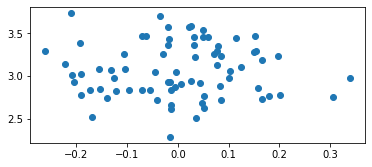

In [93]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

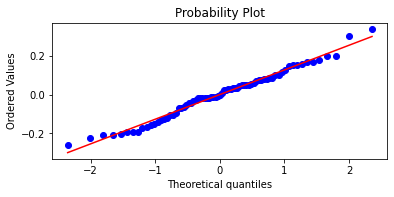

In [94]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [95]:
socio.loc[socio['Community Area Number']==41]

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Violent_Rate,Logged PERCENT HOUSEHOLDS BELOW POVERTY,Logged PERCENT AGED 16+ UNEMPLOYED,Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,Logged PER CAPITA INCOME,Logged Violent_Rate
40,41.0,Hyde Park,1.5,18.4,8.4,4.3,26.2,39056,14.0,821.619096,1.264818,0.924279,0.633468,4.591688,2.914671


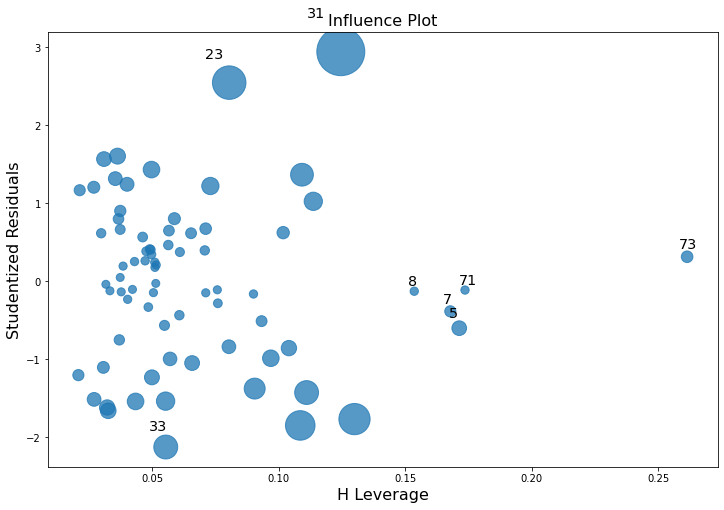

In [97]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

In [0]:
clean_2 = clean_1.copy()
clean_2 = clean_2.drop([40, 73])

In [102]:
import statsmodels.api as sm # import statsmodels 

X = clean_2[['Logged PERCENT HOUSEHOLDS BELOW POVERTY',
       'Logged PERCENT AGED 16+ UNEMPLOYED',
       'Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'Logged PER CAPITA INCOME ']]
y = clean_2['Logged Violent_Rate']
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Logged Violent_Rate   R-squared:                       0.863
Model:                             OLS   Adj. R-squared:                  0.855
Method:                  Least Squares   F-statistic:                     107.5
Date:                 Sat, 09 May 2020   Prob (F-statistic):           1.20e-28
Time:                         04:39:08   Log-Likelihood:                 48.973
No. Observations:                   73   AIC:                            -87.95
Df Residuals:                       68   BIC:                            -76.49
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   1.6641      1.226      1.357      0.179      -0.783       4.111
Logged PERCENT HOUSEHOLDS BELOW POVERTY                 0.9013      0.094      9.545      0.000       0.713       1.090
Logged PERCENT AGED 16+ UNEMPLOYED                      0.8324      0.141      5.913      0.000       0.552       1.113
Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    -0.4725      0.116     -4.063      0.000      -0.705      -0.240
Logged PER CAPITA INCOME                               -0.0244      0.224     -0.109      0.914      -0.472       0.423
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.296
Skew:                           0.063   Prob(JB):                        0.862
Kurtosis:                       2.715   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
import statsmodels.api as sm # import statsmodels 

X = clean_1[['Logged PERCENT HOUSEHOLDS BELOW POVERTY',
       'Logged PERCENT AGED 16+ UNEMPLOYED',
       'Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']]
y = clean_1['Logged Violent_Rate']
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Logged Violent_Rate   R-squared:                       0.862
Model:                             OLS   Adj. R-squared:                  0.856
Method:                  Least Squares   F-statistic:                     147.5
Date:                 Sat, 09 May 2020   Prob (F-statistic):           1.99e-30
Time:                         05:12:32   Log-Likelihood:                 49.487
No. Observations:                   75   AIC:                            -90.97
Df Residuals:                       71   BIC:                            -81.71
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   1.5184      0.085     17.909      0.000       1.349       1.687
Logged PERCENT HOUSEHOLDS BELOW POVERTY                 0.8703      0.086     10.133      0.000       0.699       1.042
Logged PERCENT AGED 16+ UNEMPLOYED                      0.8623      0.104      8.322      0.000       0.656       1.069
Logged PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    -0.4379      0.061     -7.143      0.000      -0.560      -0.316
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.229
Skew:                           0.105   Prob(JB):                        0.892
Kurtosis:                       2.829   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""